Visualizing 0000000.jpg...


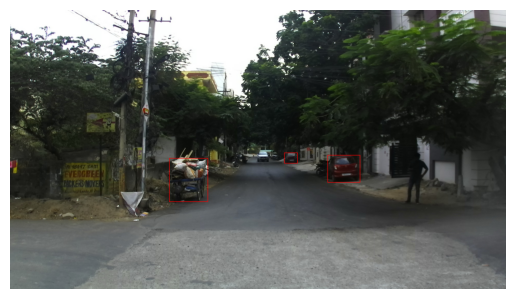

Visualizing 0000001.jpg...


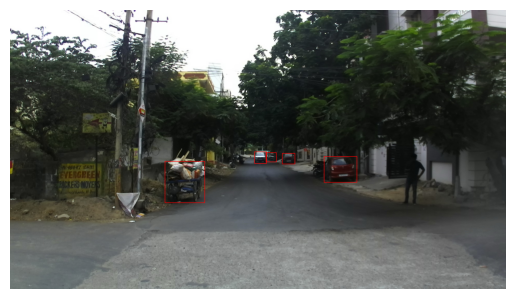

Visualizing 0000003.jpg...


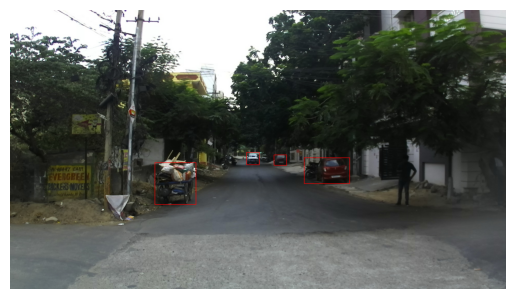

Visualizing 0000005.jpg...


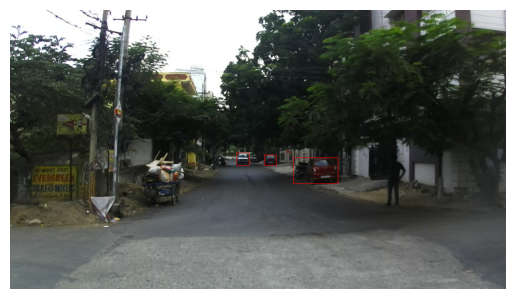

Displayed the first four images with bounding boxes.


In [1]:
import os
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def draw_bounding_boxes(image_path, xml_path):
    # Open the image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    
    # Parse the XML file
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # Iterate through each object in the XML
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        
        # Draw the bounding box
        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=2)
    
    # Display the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
images_dir = 'data\model0110\JPEGImages'
labels_dir = 'data\model0110\Annotations'

# Process the first four images and their corresponding XML files
count = 0
for image_file in os.listdir(images_dir):
    if count >= 4:
        break
    image_path = os.path.join(images_dir, image_file)
    xml_file = os.path.splitext(image_file)[0] + '.xml'
    xml_path = os.path.join(labels_dir, xml_file)
    
    if os.path.exists(xml_path):
        print(f'Visualizing {image_file}...')
        draw_bounding_boxes(image_path, xml_path)
        count += 1
    else:
        print(f'No XML file found for {image_file}')

print("Displayed the first four images with bounding boxes.")


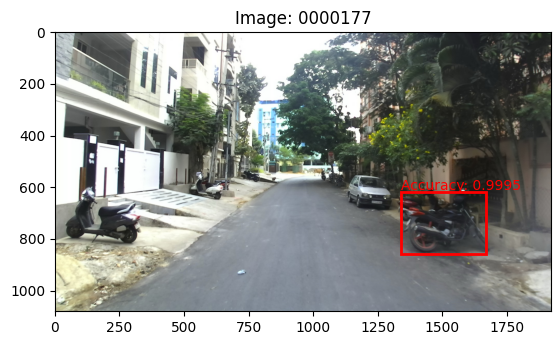

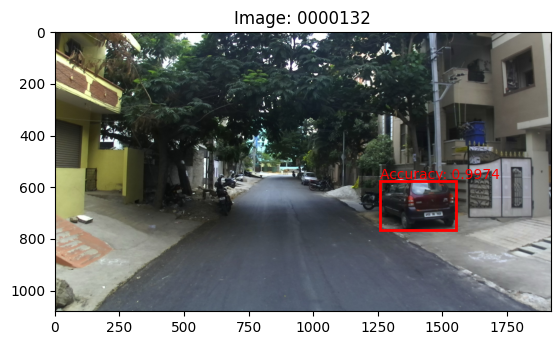

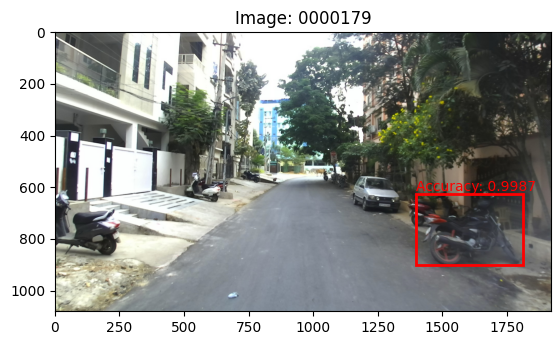

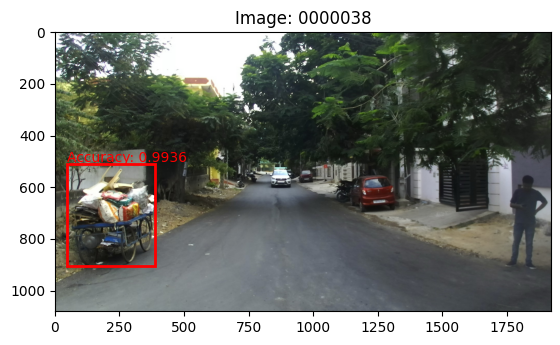

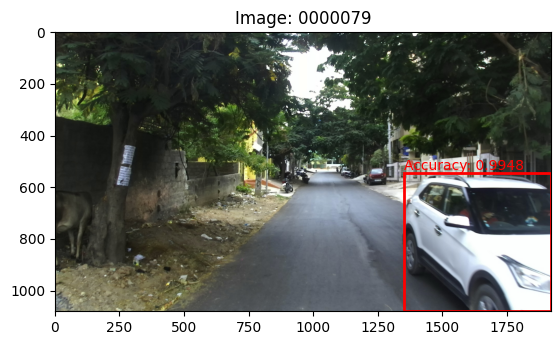

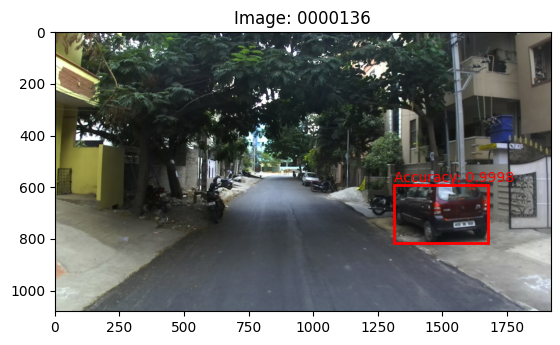

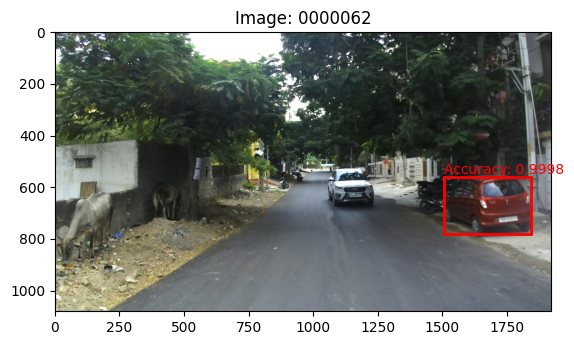

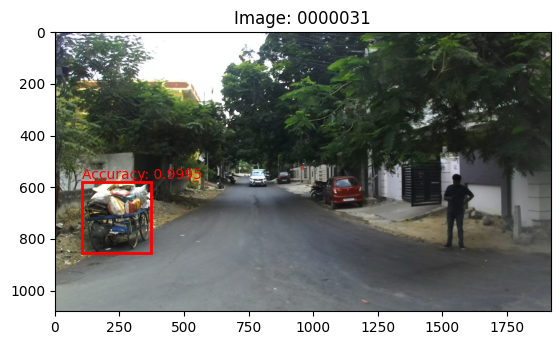

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Define the path to the text file and the images directory
text_file_path = r'models\eval_results\det_test_vehicle.txt'
images_directory = r'data\model0110\JPEGImages'

# Function to parse each line and return structured data
def parse_line(line):
    parts = line.split()
    file_name = parts[0]
    accuracy = float(parts[1])
    bbox = list(map(float, parts[2:]))
    return file_name, accuracy, bbox

# Function to process the text file
def process_text_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            file_name, accuracy, bbox = parse_line(line)
            data.append((file_name, accuracy, bbox))
    return data

# Function to evaluate the data (example: filtering by accuracy threshold)
def evaluate_data(data, accuracy_threshold=0.7):
    filtered_data = [item for item in data if item[1] >= accuracy_threshold]
    return filtered_data

# Function to visualize images with bounding boxes and accuracy score
def visualize_images_with_boxes(data):
    for item in data:
        file_name = item[0]
        accuracy = item[1]
        image_path = os.path.join(images_directory, f'{file_name}.jpg')
        if os.path.exists(image_path):
            # Open the image using PIL (Python Imaging Library)
            image = Image.open(image_path)
            width, height = image.size
            
            # Create figure and axes
            fig, ax = plt.subplots(1)
            
            # Display the image
            ax.imshow(image)
            
            # Get bounding box coordinates
            bbox = item[2]
            x1, y1, x2, y2 = bbox  # Assuming bbox is [x1, y1, x2, y2]
            
            # Ensure the bounding box coordinates are within image bounds
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(width, x2)
            y2 = min(height, y2)
            
            # Calculate width and height of the bounding box
            w = x2 - x1
            h = y2 - y1
            
            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), w, h, linewidth=2, edgecolor='r', facecolor='none')
            
            # Add the patch to the Axes
            ax.add_patch(rect)
            
            # Annotate accuracy score on top of the bounding box
            ax.text(x1, y1 - 10, f'Accuracy: {accuracy:.4f}', fontsize=10, color='r')
            
            # Adjust plot limits to show the whole image with padding
            ax.set_xlim(0, width)
            ax.set_ylim(height, 0)
            
            # Display image with bounding box
            plt.title(f'Image: {file_name}')
            plt.show()
        else:
            print(f'Image file does NOT exist for {file_name}')

# Main function
def main():
    # Process the text file
    data = process_text_file(text_file_path)

    # Evaluate the data with an accuracy threshold
    accuracy_threshold = 0.9
    evaluated_data = evaluate_data(data, accuracy_threshold)

    # Visualize images with bounding boxes and accuracy score
    visualize_images_with_boxes(evaluated_data)

if __name__ == "__main__":
    main()
